# Importation des librairies

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
from plotly import graph_objects as go
import json
from json import load
from sqlalchemy import create_engine
import chart_studio.plotly as py
from main import Bin_
#chart_studio.tools.set_credentials_file (username = 'FIDELIO', api_key = 'PGNN8cBwEInzoVXnbW8z')

In [2]:
#On importe le fichier json pour rendre anonyme l'entrée de nos données personnelles lors de la connexion avec la base de données 
fichierConfig = "../data/config.json" 
with open(fichierConfig) as fichier:config = json.load(fichier)["mysql"]
password = Bin_(config["password"])._UserP()

In [3]:
engine = create_engine('mysql+' + config["connector"] + '://' + config["user"] + ":" + password + "@" + config["host"] + ":" + config["port"] + "/" + config["bdd"], echo=True)

In [4]:
#On place dans une variable les jointures des tables catégorie socio-pro, population, ville et age
jointure_csp_age_ville = """SELECT * FROM categorie_socio_pro JOIN population
ON categorie_socio_pro.csp_id = population.po_csp_id_fk
JOIN ville
ON population.po_vi_id_fk = ville.vi_id
JOIN age 
ON age.ag_id = population.po_ag_id_fk;"""

#On charge la variable que l'on vient de créer en la connectant à la BDD
df = pd.read_sql_query(jointure_csp_age_ville, engine)
df

2021-01-13 13:46:20,038 INFO sqlalchemy.engine.base.Engine SHOW VARIABLES LIKE 'sql_mode'
2021-01-13 13:46:20,040 INFO sqlalchemy.engine.base.Engine {}
2021-01-13 13:46:20,049 INFO sqlalchemy.engine.base.Engine SHOW VARIABLES LIKE 'lower_case_table_names'
2021-01-13 13:46:20,050 INFO sqlalchemy.engine.base.Engine {}
2021-01-13 13:46:20,055 INFO sqlalchemy.engine.base.Engine SELECT DATABASE()
2021-01-13 13:46:20,056 INFO sqlalchemy.engine.base.Engine {}
2021-01-13 13:46:20,059 INFO sqlalchemy.engine.base.Engine show collation where `Charset` = 'utf8mb4' and `Collation` = 'utf8mb4_bin'
2021-01-13 13:46:20,060 INFO sqlalchemy.engine.base.Engine {}
2021-01-13 13:46:20,065 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS CHAR(60)) AS anon_1
2021-01-13 13:46:20,065 INFO sqlalchemy.engine.base.Engine {}
2021-01-13 13:46:20,067 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS CHAR(60)) AS anon_1
2021-01-13 13:46:20,069 INFO sqlalchemy.engine.base.E

,csp_id,csp_nom,po_id,po_source,po_annee,po_nbre_pop,po_csp_id_fk,po_ag_id_fk,po_vi_id_fk,vi_id,vi_nom,ag_id,ag_tranche_age
0,1,Agriculteurs exploitants,3,"Insee, Recensement de la population (RP), expl...",2017,0,1,1,1,1,Cannes,1,15 a 24
1,2,Artisans. commerçants. chefs entreprise,8,"Insee, Recensement de la population (RP), expl...",2017,40,2,1,1,1,Cannes,1,15 a 24
2,3,Cadres et professions intellectuelles supérieures,13,"Insee, Recensement de la population (RP), expl...",2017,72,3,1,1,1,Cannes,1,15 a 24
3,4,Professions intermédiaires,18,"Insee, Recensement de la population (RP), expl...",2017,477,4,1,1,1,Cannes,1,15 a 24
4,5,Employés,23,"Insee, Recensement de la population (RP), expl...",2017,1324,5,1,1,1,Cannes,1,15 a 24
...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,5,Employés,114,"Insee, Recensement de la population (RP), expl...",2017,52,5,3,5,5,Theoule-Sur-Mer,3,55 et plus
131,6,Ouvriers,119,"Insee, Recensement de la population (RP), expl...",2017,5,6,3,5,5,Theoule-Sur-Mer,3,55 et plus
132,7,Retraités,124,"Insee, Recensement de la population (RP), expl...",2017,429,7,3,5,5,Theoule-Sur-Mer,3,55 et plus
133,8,Autres personnes sans activité professionnelle,129,"Insee, Recensement de la population (RP), expl...",2017,64,8,3,5,5,Theoule-Sur-Mer,3,55 et plus


In [5]:
#On place dans une variable les jointures des tables ville, entreprise et secteur d'activité
jointure_ville_entreprise_sa = """SELECT * FROM ville
JOIN entreprise
ON ville.vi_id = entreprise.en_vi_id_fk
JOIN secteur_activite
ON entreprise.en_sa_id_fk = secteur_activite.sa_id;"""

#On charge la variable que l'on vient de créer en la connectant à la BDD
df1 = pd.read_sql_query(jointure_ville_entreprise_sa, engine)
df1

2021-01-13 13:46:20,175 INFO sqlalchemy.engine.base.Engine SELECT * FROM ville
JOIN entreprise
ON ville.vi_id = entreprise.en_vi_id_fk
JOIN secteur_activite
ON entreprise.en_sa_id_fk = secteur_activite.sa_id;
2021-01-13 13:46:20,176 INFO sqlalchemy.engine.base.Engine {}


,vi_id,vi_nom,en_id,en_nom,en_siren,en_nic,en_adresse,en_code_postal,en_vi_id_fk,en_sa_id_fk,sa_id,sa_nom
0,1,Cannes,30431958528,None,304319585,28,av pierre de coubertin,6150,1,1,1,"Agriculture, sylviculture et pêche"
1,1,Cannes,31056075013,None,310560750,13,46 bd du perier,6400,1,1,1,"Agriculture, sylviculture et pêche"
2,1,Cannes,32668413113,groupe forestier de la montagne orpiere,326684131,13,26 av coste belle,6400,1,1,1,"Agriculture, sylviculture et pêche"
3,1,Cannes,32823582536,None,328235825,36,9 rue lalanne,6400,1,1,1,"Agriculture, sylviculture et pêche"
4,1,Cannes,33135939812,None,331359398,12,che de l abadie,6150,1,1,1,"Agriculture, sylviculture et pêche"
...,...,...,...,...,...,...,...,...,...,...,...,...
54637,5,Theoule-Sur-Mer,83815350015,None,838153500,15,1 bd eugene de quay,6590,5,19,19,Autres activités de services
54638,5,Theoule-Sur-Mer,84878998813,ass amicale des sapeurs pompiers de theoule su...,848789988,13,42 av de lerins,6590,5,19,19,Autres activités de services
54639,5,Theoule-Sur-Mer,84972285512,ultime espoir,849722855,12,25 av van loo,6590,5,19,19,Autres activités de services
54640,5,Theoule-Sur-Mer,85086739111,None,850867391,11,10 av du trayas,6590,5,19,19,Autres activités de services


In [6]:
#On place dans une variable les jointures des tables ville, logement et catégorie logement
jointure_ville_logement_cl = """SELECT * FROM ville
JOIN logement
ON ville.vi_id = logement.lo_vi_id_fk
JOIN categorie_logement
ON logement.lo_cl_id_fk = categorie_logement.cl_id;"""

#On charge la variable que l'on vient de créer en la connectant à la BDD
df2 = pd.read_sql_query(jointure_ville_logement_cl, engine)
df2

2021-01-13 13:46:21,969 INFO sqlalchemy.engine.base.Engine SELECT * FROM ville
JOIN logement
ON ville.vi_id = logement.lo_vi_id_fk
JOIN categorie_logement
ON logement.lo_cl_id_fk = categorie_logement.cl_id;
2021-01-13 13:46:21,970 INFO sqlalchemy.engine.base.Engine {}


,vi_id,vi_nom,lo_id,lo_nbre,lo_vi_id_fk,lo_cl_id_fk,cl_id,cl_nom
0,1,Cannes,4,37735,1,1,1,Résidences principales
1,2,Le Cannet,3,21276,2,1,1,Résidences principales
2,3,Mougins,2,8403,3,1,1,Résidences principales
3,5,Theoule-Sur-Mer,5,694,5,1,1,Résidences principales
4,1,Cannes,9,31433,1,2,2,Résid. secondaires et log. occasionnels
5,2,Le Cannet,8,4104,2,2,2,Résid. secondaires et log. occasionnels
6,3,Mougins,7,1983,3,2,2,Résid. secondaires et log. occasionnels
7,4,Mandelieu-La-Napoule,6,8694,4,2,2,Résid. secondaires et log. occasionnels
8,5,Theoule-Sur-Mer,10,2564,5,2,2,Résid. secondaires et log. occasionnels
9,1,Cannes,14,2096,1,3,3,Logements vacants


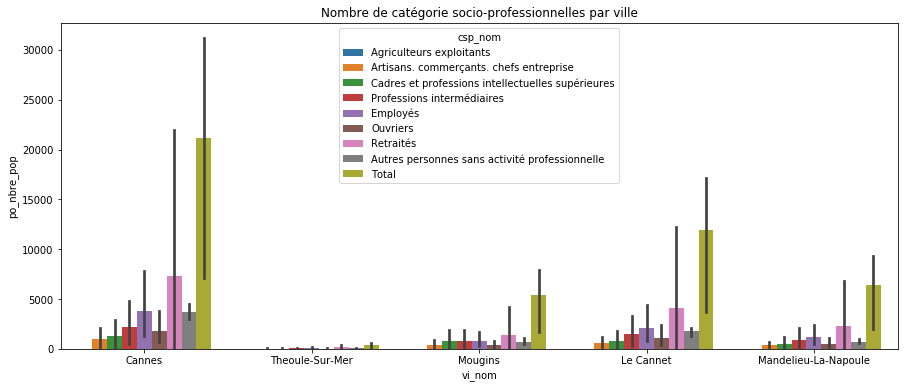

In [8]:
#Diagramme à barre présentant le nombre de catégories socio-professionnelles par ville de l'agglomération en 
#fonction du nombre de population par ville
plt.figure(figsize = [15, 6])
plt.title("Nombre de catégorie socio-professionnelles par ville")
sns.barplot(x="vi_nom", hue="csp_nom", y="po_nbre_pop", data=df, order=df['vi_nom'].value_counts().keys())

plt.savefig("../CliiinkApp/static/img/charts/csp_parv_ville.png", dpi = 100, format = "png")

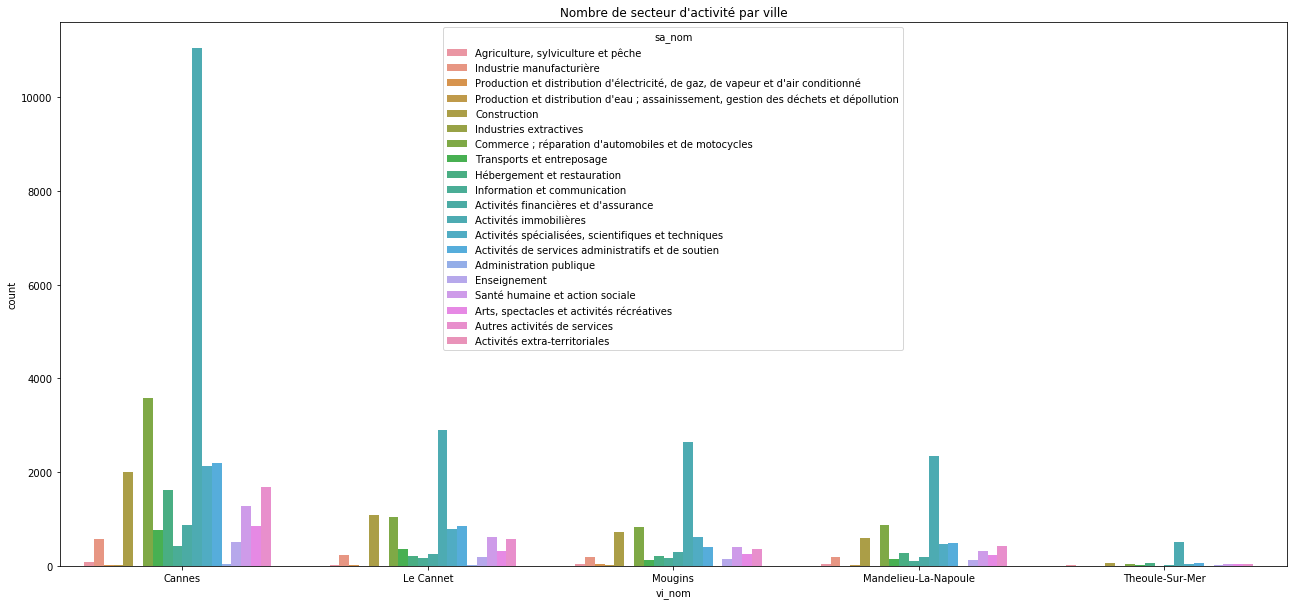

In [9]:
#Diagramme à barre présentant le nombre de secteurs d'activité par ville de l'agglomération
plt.figure(figsize = [22, 10])
plt.title("Nombre de secteur d'activité par ville")
sns.countplot(x="vi_nom", hue="sa_nom", data=df1, order=df1['vi_nom'].value_counts().keys())

plt.savefig("../CliiinkApp/static/img/charts/sa_parville.png", dpi = 100, format = "png")

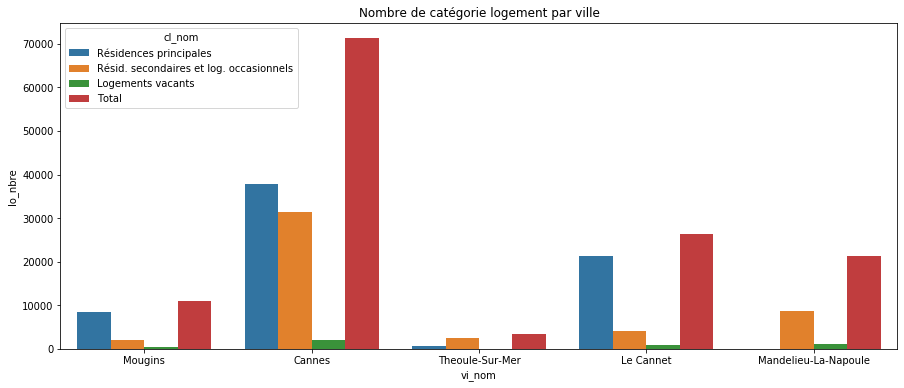

In [10]:
#Diagramme à barre présentant le nombre de catégories logement par ville de l'agglomération
plt.figure(figsize = [15, 6])
plt.title("Nombre de catégorie logement par ville")
sns.barplot(x="vi_nom", hue="cl_nom", y="lo_nbre", data=df2, order=df2['vi_nom'].value_counts().keys())

plt.savefig("../CliiinkApp/static/img/charts/cl_parville.png", dpi = 100, format = "png")

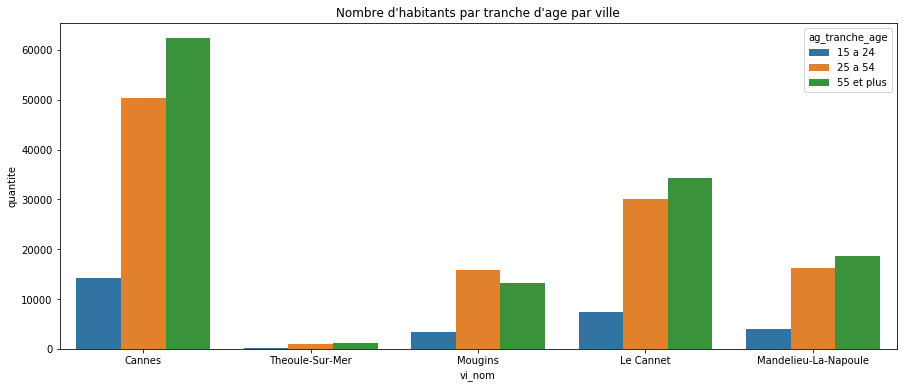

In [11]:
#Diagramme à barre présentant le nombre d'habitants par tranche d'age par ville de l'agglomération
df3 = df.groupby(by=["vi_nom", "ag_tranche_age"])["po_nbre_pop"].sum().reset_index(name="quantite")

plt.figure(figsize = [15, 6])
plt.title("Nombre d'habitants par tranche d'age par ville")
sns.barplot(x="vi_nom", hue="ag_tranche_age", y="quantite", data=df3, order=df['vi_nom'].value_counts().keys())

plt.savefig("../CliiinkApp/static/img/charts/tranche_age_pop.png", dpi = 100, format = "png")

In [12]:
#Diagramme à barre présentant le nombre d'habitants par tranche d'age par ville de l'agglomération
graphHabAge = px.bar(df3, x="vi_nom", y="quantite", color='ag_tranche_age', title="Nombre d'habitants par tranche d'age par ville")
py.iplot(graphHabAge, filename='jupyter-styled_bar')

In [13]:
fig = go.Figure()
df4 = """SELECT SUM(po_nbre_pop) as nombre, csp_nom as csp, ag_tranche_age as age 
FROM population 
JOIN categorie_socio_pro ON population.po_csp_id_fk = categorie_socio_pro.csp_id 
JOIN age ON population.po_ag_id_fk = age.ag_id where csp_nom not in ('total') 
GROUP BY csp, age 
ORDER BY csp DESC, nombre 
ASC;"""

df4 = pd.read_sql_query(df4, engine)
df4

2021-01-13 13:58:26,499 INFO sqlalchemy.engine.base.Engine SELECT SUM(po_nbre_pop) as nombre, csp_nom as csp, ag_tranche_age as age 
FROM population 
JOIN categorie_socio_pro ON population.po_csp_id_fk = categorie_socio_pro.csp_id 
JOIN age ON population.po_ag_id_fk = age.ag_id where csp_nom not in ('total') 
GROUP BY csp, age 
ORDER BY csp DESC, nombre 
ASC;
2021-01-13 13:58:26,500 INFO sqlalchemy.engine.base.Engine {}


,nombre,csp,age
0,0.0,Retraités,15 a 24
1,205.0,Retraités,25 a 54
2,45741.0,Retraités,55 et plus
3,1173.0,Professions intermédiaires,15 a 24
4,2884.0,Professions intermédiaires,55 et plus
5,12209.0,Professions intermédiaires,25 a 54
6,1491.0,Ouvriers,15 a 24
7,1813.0,Ouvriers,55 et plus
8,8171.0,Ouvriers,25 a 54
9,2852.0,Employés,15 a 24


In [14]:
fig = px.funnel(df4, x='nombre', y='csp', color='age')

py.iplot(fig, filename='jupyter-styled_bar2')

In [15]:
requete = """SELECT collecte.poids, collecteur.codeInsee 
FROM collecte
INNER JOIN collecteur ON collecte.poids = collecteur.objectid;
"""

data_collecteur = pd.read_sql(requete, engine).groupby("codeInsee").sum().reset_index()
data_collecteur

2021-01-13 13:58:30,972 INFO sqlalchemy.engine.base.Engine DESCRIBE `SELECT collecte.poids, collecteur.codeInsee 
FROM collecte
INNER JOIN collecteur ON collecte.poids = collecteur.objectid;
`
2021-01-13 13:58:30,977 INFO sqlalchemy.engine.base.Engine {}
2021-01-13 13:58:30,979 INFO sqlalchemy.engine.base.Engine ROLLBACK
2021-01-13 13:58:30,982 INFO sqlalchemy.engine.base.Engine SELECT collecte.poids, collecteur.codeInsee 
FROM collecte
INNER JOIN collecteur ON collecte.poids = collecteur.objectid;

2021-01-13 13:58:30,984 INFO sqlalchemy.engine.base.Engine {}


,codeInsee,poids
0,06029,6424944
1,06030,1798343
2,06079,2138641
3,06085,686734
4,06138,1306064


In [17]:
#Diagramme à barre présentant le poids des collecteurs par ville

graphpoidscollecteur = px.bar(data_collecteur, x = data_collecteur.codeInsee, y="poids", title="Poids des collectes par ville")
py.iplot(graphpoidscollecteur, filename='jupyter-styled_bar')

graphpoidscollecteur.show()
graphpoidscollecteur.write_html("../CliiinkApp/static/img/charts/collecte_ville.html")

In [18]:
#On place dans une variable les jointures des tables catégorie socio-pro, population, ville et age
jointure_pop_ville_csp = """SELECT po_nbre_pop, vi_nom, csp_nom FROM categorie_socio_pro JOIN population
ON categorie_socio_pro.csp_id = population.po_csp_id_fk
JOIN ville
ON population.po_vi_id_fk = ville.vi_id
WHERE csp_nom not in ('Total');"""

#On charge la variable que l'on vient de créer en la connectant à la BDD
df_csp = pd.read_sql_query(jointure_pop_ville_csp, engine).groupby("vi_nom").sum().reset_index()
df_csp 

2021-01-13 13:58:49,043 INFO sqlalchemy.engine.base.Engine SELECT po_nbre_pop, vi_nom, csp_nom FROM categorie_socio_pro JOIN population
ON categorie_socio_pro.csp_id = population.po_csp_id_fk
JOIN ville
ON population.po_vi_id_fk = ville.vi_id
WHERE csp_nom not in ('Total');
2021-01-13 13:58:49,045 INFO sqlalchemy.engine.base.Engine {}


,vi_nom,po_nbre_pop
0,Cannes,63499
1,Le Cannet,35902
2,Mandelieu-La-Napoule,19371
3,Mougins,16212
4,Theoule-Sur-Mer,1235


In [19]:
fig = px.pie(df_csp, values='po_nbre_pop', names='vi_nom', title="Nombre d'habitants par ville de l'agglomération")
fig.show()

fig.write_html("../CliiinkApp/static/img/charts/pop_parville.html")

In [20]:
fig = px.scatter_3d(df_csp , x="po_nbre_pop", y="vi_nom", z="vi_nom", color="po_nbre_pop", color_discrete_map = {"Cannes": "blue", "Le Cannet": "green", "Théoule-sur-Mer":"red", "Mandelieu-La-Napoule": "yellow", "Mougins":"black"})
fig.show()

fig.write_html("../CliiinkApp/static/img/charts/pop3d_parville.html")

In [21]:
pop_poids_ville = """SELECT demo.population, demo.vi_nom, poubelle.poids
FROM

(SELECT sum(po_nbre_pop) as population, vi_nom
FROM categorie_socio_pro 
JOIN population ON categorie_socio_pro.csp_id = population.po_csp_id_fk
JOIN ville ON population.po_vi_id_fk = ville.vi_id
WHERE csp_nom not in ('Total')
GROUP BY vi_nom) as demo

INNER JOIN 

(SELECT vi_nom, sum(poids) as poids
FROM collecte
INNER JOIN ville ON ville.vi_id = collecte.ville
GROUP BY vi_nom) as poubelle

ON demo.vi_nom = poubelle.vi_nom;"""

df_pop_poids_ville = pd.read_sql_query(pop_poids_ville, engine)
df_pop_poids_ville

2021-01-13 13:59:08,953 INFO sqlalchemy.engine.base.Engine SELECT demo.population, demo.vi_nom, poubelle.poids
FROM

(SELECT sum(po_nbre_pop) as population, vi_nom
FROM categorie_socio_pro 
JOIN population ON categorie_socio_pro.csp_id = population.po_csp_id_fk
JOIN ville ON population.po_vi_id_fk = ville.vi_id
WHERE csp_nom not in ('Total')
GROUP BY vi_nom) as demo

INNER JOIN 

(SELECT vi_nom, sum(poids) as poids
FROM collecte
INNER JOIN ville ON ville.vi_id = collecte.ville
GROUP BY vi_nom) as poubelle

ON demo.vi_nom = poubelle.vi_nom;
2021-01-13 13:59:08,954 INFO sqlalchemy.engine.base.Engine {}


,population,vi_nom,poids
0,63499.0,Cannes,7468078.0
1,35902.0,Le Cannet,2196647.0
2,19371.0,Mandelieu-La-Napoule,2364881.0
3,16212.0,Mougins,1560397.0
4,1235.0,Theoule-Sur-Mer,351445.0


In [22]:
fig = px.histogram(df_pop_poids_ville, x="vi_nom", y="population", color="poids", marginal="rug", hover_data=df_pop_poids_ville.columns)
fig.show()

fig.write_html("../CliiinkApp/static/img/charts/collecte_pop_parville.html")

In [23]:
fig = px.scatter_3d(df_pop_poids_ville, x="vi_nom", y="poids", z="population", color="poids", color_discrete_map = {"Cannes": "blue", "Le Cannet": "green", "Théoule-sur-Mer":"red", "Mandelieu-La-Napoule": "yellow", "Mougins":"black"})
fig.show()

fig.write_html("../CliiinkApp/static/img/charts/collecte_pop3d_parville.html")

In [24]:
fig = px.scatter(df_pop_poids_ville, x="vi_nom", y="population", size="poids", color="vi_nom", size_max=60)
fig.show()

fig.write_html("../CliiinkApp/static/img/charts/collecte_pop_parville_nuage1.html")

In [25]:
en_collecte_vi = """SELECT secte.nbre_entreprise, secte.vi_nom, poubelle.poids
FROM

(SELECT count(en_id) as nbre_entreprise, vi_nom
FROM secteur_activite
JOIN entreprise ON sa_id = entreprise.en_sa_id_fk
JOIN ville ON entreprise.en_vi_id_fk = ville.vi_id
GROUP BY vi_nom) as secte

INNER JOIN 

(SELECT vi_nom, sum(poids) as poids
FROM collecte
INNER JOIN ville ON ville.vi_id = collecte.ville
GROUP BY vi_nom) as poubelle

ON secte.vi_nom = poubelle.vi_nom;"""

df_en_collecte_ville = pd.read_sql_query(en_collecte_vi, engine)
df_en_collecte_ville

2021-01-13 13:59:17,815 INFO sqlalchemy.engine.base.Engine SELECT secte.nbre_entreprise, secte.vi_nom, poubelle.poids
FROM

(SELECT count(en_id) as nbre_entreprise, vi_nom
FROM secteur_activite
JOIN entreprise ON sa_id = entreprise.en_sa_id_fk
JOIN ville ON entreprise.en_vi_id_fk = ville.vi_id
GROUP BY vi_nom) as secte

INNER JOIN 

(SELECT vi_nom, sum(poids) as poids
FROM collecte
INNER JOIN ville ON ville.vi_id = collecte.ville
GROUP BY vi_nom) as poubelle

ON secte.vi_nom = poubelle.vi_nom;
2021-01-13 13:59:17,816 INFO sqlalchemy.engine.base.Engine {}


,nbre_entreprise,vi_nom,poids
0,29694,Cannes,7468078.0
1,9646,Le Cannet,2196647.0
2,6827,Mandelieu-La-Napoule,2364881.0
3,7521,Mougins,1560397.0
4,954,Theoule-Sur-Mer,351445.0


In [26]:
fig = px.scatter(df_en_collecte_ville, x="vi_nom", y="nbre_entreprise", size="poids", color="vi_nom", size_max=60)
fig.show()

fig.write_html("../CliiinkApp/static/img/charts/collecte_pop_en_nuage2.html")

In [27]:
hebergement_restauration = """SELECT secte.nbre_entreprise, secte.vi_nom, poubelle.poids
FROM

(SELECT count(en_id) as nbre_entreprise, vi_nom
FROM secteur_activite
JOIN entreprise ON sa_id = entreprise.en_sa_id_fk
JOIN ville ON entreprise.en_vi_id_fk = ville.vi_id
WHERE sa_nom = 'Hébergement et restauration'
GROUP BY vi_nom) as secte

INNER JOIN 

(SELECT vi_nom, sum(poids) as poids
FROM collecte
INNER JOIN ville ON ville.vi_id = collecte.ville
GROUP BY vi_nom) as poubelle

ON secte.vi_nom = poubelle.vi_nom;"""

df_hebergement_restauration = pd.read_sql_query(hebergement_restauration, engine)
df_hebergement_restauration

2021-01-13 13:59:21,788 INFO sqlalchemy.engine.base.Engine SELECT secte.nbre_entreprise, secte.vi_nom, poubelle.poids
FROM

(SELECT count(en_id) as nbre_entreprise, vi_nom
FROM secteur_activite
JOIN entreprise ON sa_id = entreprise.en_sa_id_fk
JOIN ville ON entreprise.en_vi_id_fk = ville.vi_id
WHERE sa_nom = 'Hébergement et restauration'
GROUP BY vi_nom) as secte

INNER JOIN 

(SELECT vi_nom, sum(poids) as poids
FROM collecte
INNER JOIN ville ON ville.vi_id = collecte.ville
GROUP BY vi_nom) as poubelle

ON secte.vi_nom = poubelle.vi_nom;
2021-01-13 13:59:21,790 INFO sqlalchemy.engine.base.Engine {}


,nbre_entreprise,vi_nom,poids
0,1621,Cannes,7468078.0
1,217,Le Cannet,2196647.0
2,272,Mandelieu-La-Napoule,2364881.0
3,219,Mougins,1560397.0
4,68,Theoule-Sur-Mer,351445.0


In [28]:
fig = px.scatter(df_hebergement_restauration, x="vi_nom", y="nbre_entreprise", size="poids", color="vi_nom", size_max=60)
fig.show()

fig.write_html("../CliiinkApp/static/img/charts/collecte_pop_hr_nuage3.html")

In [29]:
pop_age_csp = """ SELECT sum(po_nbre_pop) as population, ag_tranche_age, csp_nom
FROM population
INNER JOIN age ON age.ag_id = population.po_ag_id_fk
INNER JOIN categorie_socio_pro ON categorie_socio_pro.csp_id = population.po_csp_id_fk
WHERE csp_nom not in ('Total')
GROUP BY ag_tranche_age, csp_nom;"""

df_pop_age_csp = pd.read_sql_query(pop_age_csp, engine)
df_pop_age_csp = df_pop_age_csp[df_pop_age_csp.population != 0]
df_pop_age_csp

2021-01-13 13:59:25,810 INFO sqlalchemy.engine.base.Engine  SELECT sum(po_nbre_pop) as population, ag_tranche_age, csp_nom
FROM population
INNER JOIN age ON age.ag_id = population.po_ag_id_fk
INNER JOIN categorie_socio_pro ON categorie_socio_pro.csp_id = population.po_csp_id_fk
WHERE csp_nom not in ('Total')
GROUP BY ag_tranche_age, csp_nom;
2021-01-13 13:59:25,812 INFO sqlalchemy.engine.base.Engine {}


,population,ag_tranche_age,csp_nom
1,121.0,15 a 24,Artisans. commerçants. chefs entreprise
2,8759.0,15 a 24,Autres personnes sans activité professionnelle
3,187.0,15 a 24,Cadres et professions intellectuelles supérieures
4,2852.0,15 a 24,Employés
5,1491.0,15 a 24,Ouvriers
6,1173.0,15 a 24,Professions intermédiaires
8,53.0,25 a 54,Agriculteurs exploitants
9,5034.0,25 a 54,Artisans. commerçants. chefs entreprise
10,6725.0,25 a 54,Autres personnes sans activité professionnelle
11,7903.0,25 a 54,Cadres et professions intellectuelles supérieures


In [30]:
fig = px.sunburst(df_pop_age_csp, path=['ag_tranche_age', 'csp_nom'], values='population', color='population')
fig.show()

fig.write_html("../CliiinkApp/static/img/charts/tranche_age_csp_pop.html")